In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('climate_action_data.csv')
#structure
print("Structure")
df.info()
#check for empty values
print(df.isnull().sum())
#duplicates
print("Duplicates:", df.duplicated().sum())



Structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                       

In [7]:
#remove duplicate values
df = df.drop_duplicates(keep = 'first')
#replace error values
df.replace('error', np.nan, inplace=True)
#proper column types
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                   'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') 
#drop rows with a missing date and crop type
df = df.dropna(subset=['Date', 'Crop_Type'])
#use mean to fill empty columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
 #convert the date column
df['Date']= pd.to_datetime(df['Date'], errors = 'coerce')   
print(df.shape)
print(df.isnull().sum())

(794, 10)
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


Description


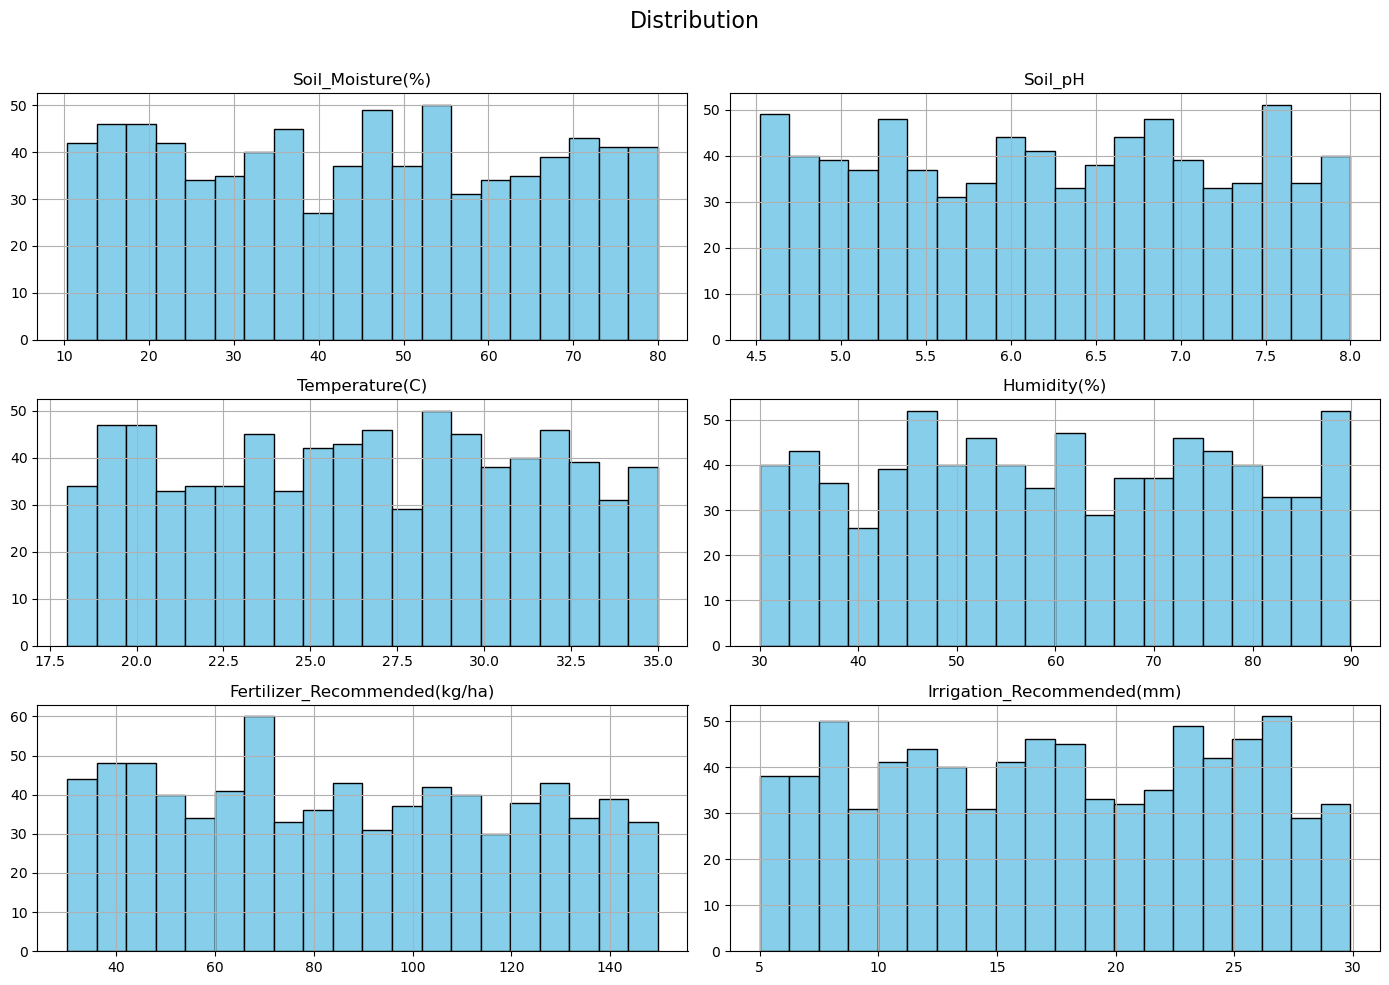

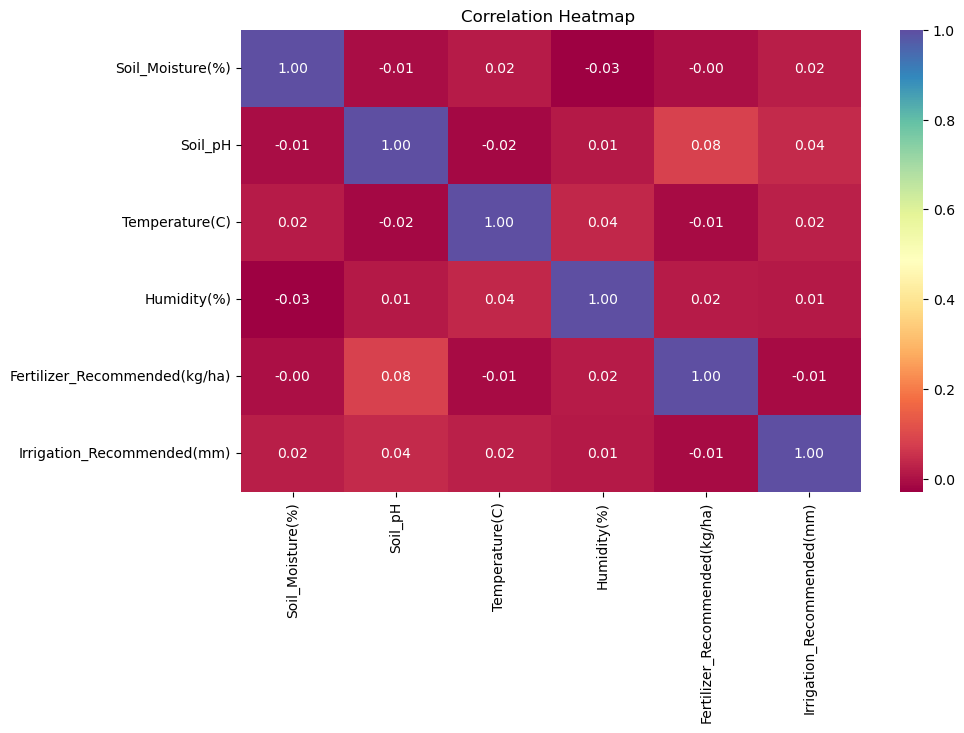

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Description")
df.describe()
# Histograms
df[numeric_columns].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Spectral', fmt='.2f')
plt.title("Correlation Heatmap ")


plt.show()



In [9]:
#which variables most influence fertilizer recommendations
corr = df.select_dtypes(include='number').corr()
fertilizer_corr = corr['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(fertilizer_corr)
#crop type with the highest average soil moisture
average_moisture= df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(average_moisture)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
Name: Fertilizer_Recommended(kg/ha), dtype: float64
Crop_Type
Wheat       47.181654
Maize       44.950933
Beans       44.335063
Tomatoes    44.182919
Lettuce     42.929364
Name: Soil_Moisture(%), dtype: float64


In [10]:
# Filter crops with average temperature > 30°C and calculate average temp + moisture
hot_crops = (
    df[df['Temperature(C)'] > 30]
    .groupby('Crop_Type')[['Temperature(C)', 'Soil_Moisture(%)']]
    .mean()
    .sort_values(by='Temperature(C)', ascending=False)
)
# Add irrigation adjustment suggestions
def suggestion_irrigation(moisture):
    if moisture < 35:
        return "Increase amount of irrigation"
    elif 35 <= moisture <= 55:
        return "Maintain current level of irrigation"
    else:
        return "Reduce level of irrigation"

hot_crops['irrigation_adjustment'] = hot_crops['Soil_Moisture(%)'].apply(suggestion_irrigation)

print(hot_crops)

           Temperature(C)  Soil_Moisture(%)  \
Crop_Type                                     
Lettuce         32.575676         42.661892   
Wheat           32.528571         42.699714   
Maize           32.430909         44.885091   
Tomatoes        32.404348         48.647391   
Beans           32.311538         46.549038   

                          irrigation_adjustment  
Crop_Type                                        
Lettuce    Maintain current level of irrigation  
Wheat      Maintain current level of irrigation  
Maize      Maintain current level of irrigation  
Tomatoes   Maintain current level of irrigation  
Beans      Maintain current level of irrigation  


In [12]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)